# <font color = teal>Microsoft Engage 2022 </font>

## <font color = purple>Project : Data Analysis</font>

### <font color = violet>By - Aditi Joshi </font>

<b>Aim</b> : Develop an application to demonstrate how the Automotive Industry could harness data to take informed decisions.

<b>Experiment</b> : Use the given sample dataset to suggest a good car model(with specifications) taking budget as an input from the user, analyze the given sample dataset and represent it graphically to find meaningful insights.

The Notebook focuses on determining the relationship between various automotive industry related parameters, attempting to gather useful information and draw conclusions.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

In [3]:
automobile = pd.read_csv("datasets/final_clean_cardataset.csv", index_col=0)

automobile.head()

,Make,Model,Variant,Price,Engine_Size_in_cc,Cylinders,Emission_Norm,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,...,EBD,Fasten_Seat_Belt_Warning,Parking_Assistance,EBA,Seat_Height_Adjustment,Kerb_Weight,Airbags,Num_Airbags,Drivetrain,Wheelbase
0,Tata,Nano Genx,Xt,292667,624.0,2,BS IV,Injection,24.0,Petrol,...,No,No,No,No,Manual Adjustment,660.0,0,2.0,RWD (Rear Wheel Drive),2230.0
1,Tata,Nano Genx,Xe,236447,624.0,2,BS IV,Injection,24.0,Petrol,...,No,No,No,No,Manual Adjustment,725.0,0,2.0,RWD (Rear Wheel Drive),2230.0
2,Tata,Nano Genx,Emax Xm,296661,624.0,2,BS IV,Injection,15.0,CNG,...,No,No,No,No,Manual Adjustment,710.0,0,2.0,RWD (Rear Wheel Drive),2230.0
3,Tata,Nano Genx,Xta,334768,624.0,2,BS IV,Injection,24.0,Petrol,...,No,No,No,No,Manual Adjustment,725.0,0,2.0,RWD (Rear Wheel Drive),2230.0
4,Tata,Nano Genx,Xm,272223,624.0,2,BS IV,Injection,24.0,Petrol,...,No,No,No,No,Manual Adjustment,725.0,0,2.0,RWD (Rear Wheel Drive),2230.0


> Data Description:


> Let us see what are the columns in the data provided to us!

In [3]:
columns = list(automobile.columns)
columns

['Make',
 'Model',
 'Variant',
 'Price',
 'Engine_Size_in_cc',
 'Cylinders',
 'Emission_Norm',
 'Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'Mileage',
 'Gears',
 'Ground_Clearance',
 'Power_Steering',
 'Power_Windows',
 'Power_Seats',
 'Keyless_Entry',
 'Power',
 'Seating_Capacity',
 'Seats_Material',
 'Type',
 'Audiosystem',
 'Bluetooth',
 'Boot_Space',
 'Central_Locking',
 'Child_Safety_Locks',
 'Distance_to_Empty',
 'Handbrake',
 'Ventilation_System',
 'Engine_Immobilizer',
 'ABS',
 'Door_Ajar_Warning',
 'EBD',
 'Fasten_Seat_Belt_Warning',
 'Parking_Assistance',
 'EBA',
 'Seat_Height_Adjustment',
 'Kerb_Weight',
 'Airbags',
 'Num_Airbags',
 'Drivetrain',
 'Wheelbase']

> Let us see what are the data types of all the attributes we have!

In [4]:
automobile.dtypes

Make                         object
Model                        object
Variant                      object
Price                         int64
Engine_Size_in_cc           float64
Cylinders                     int64
Emission_Norm                object
Fuel_System                  object
Fuel_Tank_Capacity          float64
Fuel_Type                    object
Height                      float64
Length                      float64
Width                       float64
Body_Type                    object
Mileage                     float64
Gears                        object
Ground_Clearance            float64
Power_Steering               object
Power_Windows                object
Power_Seats                  object
Keyless_Entry                object
Power                       float64
Seating_Capacity              int64
Seats_Material               object
Type                         object
Audiosystem                  object
Bluetooth                    object
Boot_Space                  

<b>Below is the summary of numeric columns of dataframe. 

It includes the number of rows, mean, standard deviation, minimum value, first quartile, second quartile, third quartile and maximum value per column with numeric data.</b>

In [5]:
automobile.describe()

,Price,Engine_Size_in_cc,Cylinders,Fuel_Tank_Capacity,Height,Length,Width,Mileage,Ground_Clearance,Power,Seating_Capacity,Boot_Space,Kerb_Weight,Airbags,Num_Airbags,Wheelbase
count,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,4.596538e+06,1858.640191,4.361285,51.966818,1591.038280,4296.883730,1788.392326,19.902117,176.300157,158.010851,5.268809,390.319864,1273.791357,0.896552,3.597962,2630.847938
std,1.214735e+07,1058.138838,1.619598,16.020098,157.866868,476.612977,150.229215,40.879284,29.752265,126.489577,1.142683,160.334301,448.759943,0.304663,2.447689,208.322814
min,2.364470e+05,72.000000,2.000000,15.000000,1.845000,4.640000,1.845000,3.400000,100.000000,47.000000,2.000000,20.000000,660.000000,0.000000,1.000000,1840.000000
25%,7.438760e+05,1198.000000,4.000000,41.000000,1495.000000,3991.750000,1698.000000,16.000000,165.000000,82.824000,5.000000,295.000000,990.467868,1.000000,2.000000,2470.000000
50%,1.060064e+06,1497.000000,4.000000,49.300862,1557.000000,4331.000000,1771.730286,19.010000,165.000000,108.460000,5.000000,390.319864,1065.000000,1.000000,2.000000,2600.000000
75%,2.979828e+06,1998.000000,4.000000,60.000000,1666.000000,4620.000000,1850.500000,21.040000,188.000000,174.522000,5.000000,460.000000,1562.000000,1.000000,6.000000,2740.000000
max,2.121554e+08,7993.000000,16.000000,105.000000,2670.000000,6092.000000,2226.000000,1449.000000,498.000000,789.000000,16.000000,1761.000000,2962.000000,1.000000,14.000000,3820.000000


### <i>Importing libraries for plotting graphs!</i>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Defining colors to stay consistent throughout

In [7]:
title_color = "darkblue"
plot_color = "aqua"
plot_alt_color = "cyan"
plot_color_secondary = "green"
y_title_margin = 1.0

In [8]:
# functions which will be used throughout the notebook to avoid code repitition

def DrawBarPlot(data, col_name, xlabel, ylabel, title, filename, top=10, fig_size=(10,6)):
    # top -> how many top entries to be taken
    # rest variables are self_explanatory
    
    fig, ax = plt.subplots(figsize = fig_size, ncols=1, nrows=1)
    fig.patch.set_alpha(0.5)
    ax.set_title(title, y = y_title_margin, color = title_color, fontsize = 16, fontweight = "bold")
    ax.patch.set_alpha(0)

    top_col_name = data[col_name].value_counts()[:top].to_frame()
    symbol_dist = sns.barplot(top_col_name[col_name],top_col_name.index, color = plot_color, ax = ax)
    symbol_dist.set_ylabel(ylabel, fontsize = 14 )
    symbol_dist.set_xlabel(xlabel, fontsize = 14)

    fig.savefig(filename, dpi = fig.dpi, bbox_inches = 'tight')
    
def DrawCountPlot(data, col_name, fig_size, xlabel, ylabel, title, filename):
    fig, ax = plt.subplots(figsize = fig_size, ncols = 1, nrows = 1)
    fig.patch.set_alpha(0.5)
    ax.set_title(title, y = y_title_margin, color = title_color, 
             fontsize = 16, fontweight = "bold")
    ax.patch.set_alpha(0)

    symbol_dist = sns.countplot(data[col_name], color = plot_color, ax = ax)
    symbol_dist.set_ylabel(ylabel, fontsize=14 )
    symbol_dist.set_xlabel(xlabel, fontsize=14)

    fig.savefig(filename, dpi = fig.dpi, bbox_inches='tight')
    
def DrawPairPlot(dframe, kind, diag_kind, filename):
    sns.pairplot(dframe, kind = kind, diag_kind = diag_kind, diag_kws=dict(color=plot_color, linewidth=1), 
                 plot_kws=dict(color=plot_color))
    plt.savefig(filename, bbox_inches='tight')
    
def DrawScatterPlot(dframe, xcol, ycol, size, plotColor, title, xlabel, ylabel, filename):
    fig, ax = plt.subplots(figsize=size, ncols=1, nrows=1) # get the figure and axes objects 

    fig.patch.set_alpha(1)
    ax.set_title(title, y = y_title_margin, fontsize=16, color=title_color, fontweight='bold')
    ax.patch.set_alpha(1)
    
    ax = sns.scatterplot(x=xcol, y=ycol, data=dframe, color=plotColor)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight')
    
    
def DrawDistPlot(data, col_name, xlabel, ylabel, title, filename, Bins=5, KDE=False, fig_size=(10,6)):
    fig, ax = plt.subplots(figsize = fig_size, ncols=1, nrows=1)
    fig.patch.set_alpha(0.5)
    ax.set_title(title, y = y_title_margin, color = title_color, fontsize = 16, fontweight = "bold")
    ax.patch.set_alpha(0)

    symbol_dist = sns.distplot(data[col_name], bins = Bins, kde = KDE, ax = ax, 
                           hist_kws = {"linewidth": 1, "alpha": 1, "color": plot_color})
    symbol_dist.set_ylabel(ylabel, fontsize = 14 )
    symbol_dist.set_xlabel(xlabel, fontsize = 14)

    fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight')

## Which company makes the most cars?

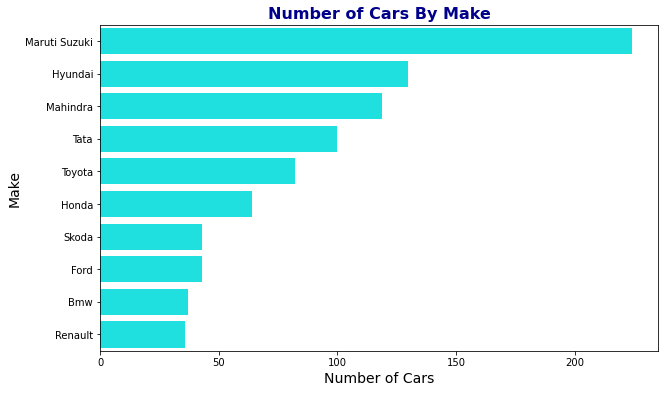

In [9]:
filename = 'Images/numcars_by_make_wo.png' #_wo stands for with outliers
title = 'Number of Cars By Make'
xlabel = 'Number of Cars'
ylabel = 'Make'

DrawBarPlot(automobile, 'Make', xlabel, ylabel, title, filename)

Conclusions:
- Maruti Suzuki makes the most cars followed by Hyundai, Mahindra, Tata and Toyota.
- Some of the companies which did not come in this graph are Lamborghini, Posche, Buggati and Aston Martin. These cars are luxury cars which have less production worldwide. 
- About data: It seems that these car samples are collected in/from India/Asia because it is known that Maruti Suzuki cars are mostly sold in India/Indian subcontinent.

#### Which are the most popular Fuel types?

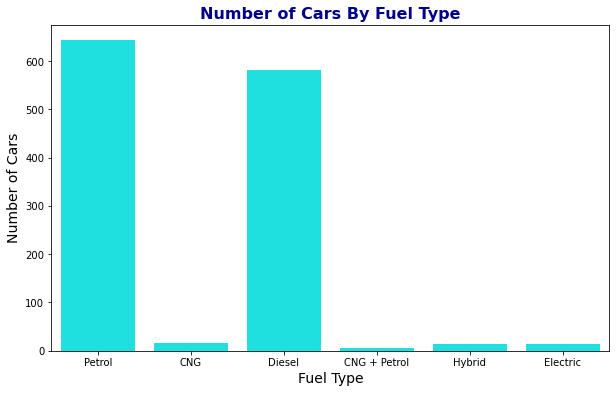

In [10]:
filename = 'Images/numcars_by_fueltype_wo.png'
title = 'Number of Cars By Fuel Type'
xlabel = 'Fuel Type'
ylabel = 'Number of Cars'

DrawCountPlot(automobile, 'Fuel_Type', (10,6), xlabel, ylabel, title, filename)

##### Conclusions:
- Most cars in this dataset run on Petrol and Diesel. 
- Other fuel types like CNG, CNG+Petrol seem to lagging behind by a huge margin.
- It is observed that people have started to positively consider electric cars with time.
- Considering the fact that this data is from India/Asia region, one would think that people prefer CNG over Petrol/Diesel due to rising costs. This only means that either this data is not recent or that people are still being slightly conservative about the fuel type.

#### Which type of cars is most preferred?

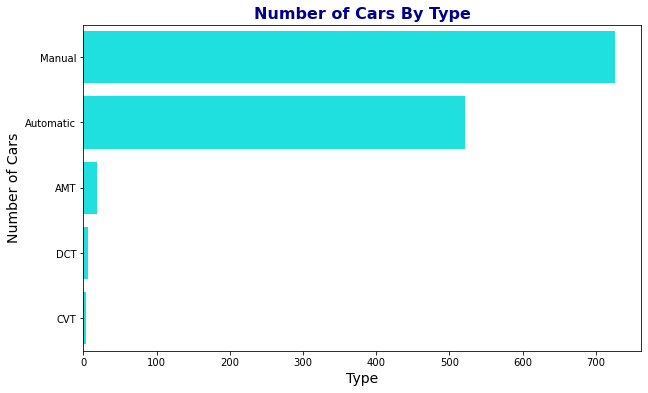

In [11]:
filename = 'Images/numcars_by_type_wo.png'
title = 'Number of Cars By Type'
xlabel = 'Type'
ylabel = 'Number of Cars'

DrawBarPlot(automobile, 'Type', xlabel, ylabel, title, filename)

##### Conclusions:
- We can see from the graph that most cars on the roads are manual, but also that Automatic cars are strong contenders. 
- With rise of AI and ML, companies are increasingly adopting automation in their models.
- AMT, DCT and CVT stand for Automated Manual Transmission, Dual-Clutch Transmission and Continuously Variable Transmission respectively. Driving types such as AMT, DCT and CVT indeed have certain advantages which give smooth driving experience, but it seems either not many people are aware of these types or that since they are on the expensive side, not many can afford it.
- It also might be that we need to analyse more data in order to form conclusions about people prefering Manual and Automatic cars over AMT, DCT and CVT

#### Which is the Fuel System most cars adopt?

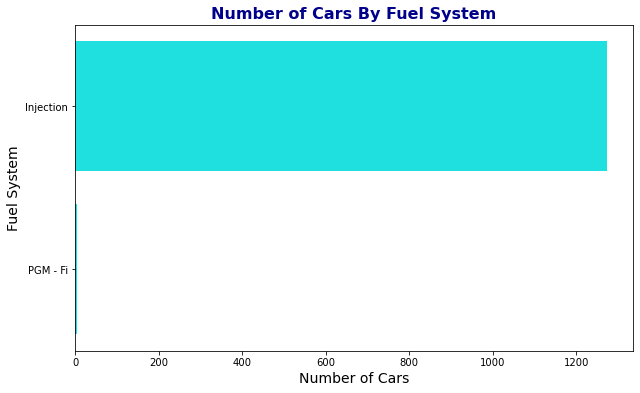

In [13]:
filename = 'Images/numcars_by_fuelsystem_wo.png'
title = 'Number of Cars By Fuel System'
xlabel = 'Number of Cars'
ylabel = 'Fuel System'

DrawBarPlot(automobile, 'Fuel_System', xlabel, ylabel, title, filename)

#### Which cars come with inbuilt airbags?

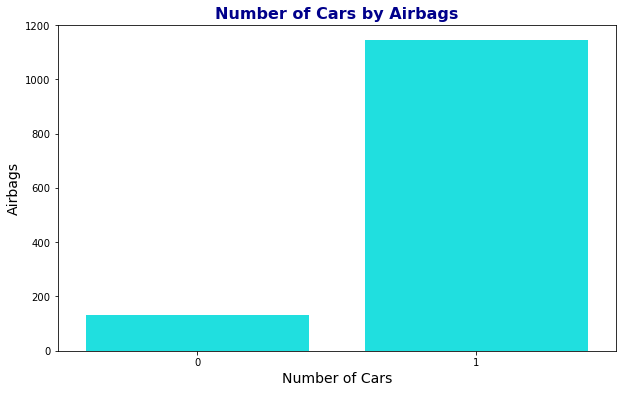

In [14]:
filename = 'Images/numcars_by_airbags_wo.png'
title = 'Number of Cars by Airbags'
xlabel = 'Number of Cars'
ylabel = 'Airbags'

DrawCountPlot(automobile, 'Airbags', (10,6), xlabel, ylabel, title, filename)

##### Conclusions:
- From the given data, most cars do have airbags. 
- Only about 1/7th of the cars do not have airbags.

##### Let us take a look at how many airbags do most cars have.

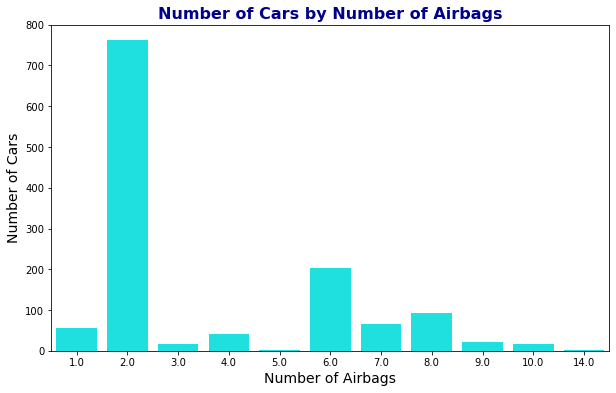

In [15]:
filename = 'Images/numcars_by_numairbags_wo.png'
title = 'Number of Cars by Number of Airbags'
xlabel = 'Number of Airbags'
ylabel = 'Number of Cars'

DrawCountPlot(automobile, 'Num_Airbags', (10,6), xlabel, ylabel, title, filename)

##### Conclusions:

- Most of the cars which have Airbags have 2 Airbags, followed by 6 Airbags with a large margin.
- Least number of cars have 5 or 14 Airbags.

#### Let us take a look at Drivetrain and what is the most popular specification for Drivetrain.

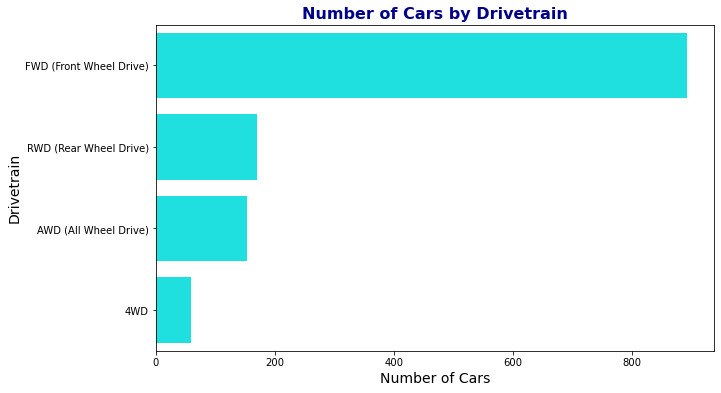

In [16]:
filename = 'Images/numcars_by_drivetrain_wo.png'
title = 'Number of Cars by Drivetrain'
xlabel = 'Number of Cars'
ylabel = 'Drivetrain'

DrawBarPlot(automobile, 'Drivetrain', xlabel, ylabel, title, filename)

##### Conclusions:

- Most popular Drivetrain specification is FWD (Front Wheel Drive), followed by AWD(All Wheel Drive) and RWD (Rear Wheel Drive).

#### How many seater cars are most produced?

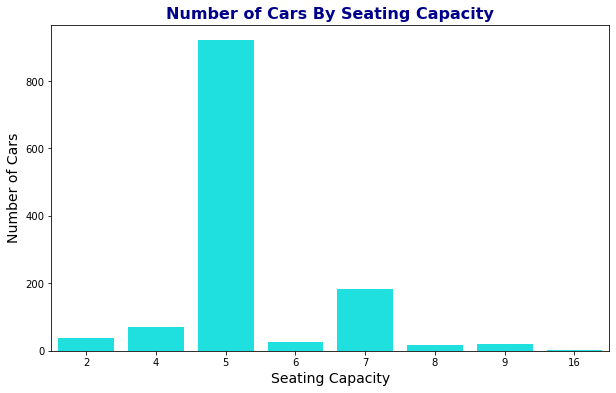

In [17]:
filename = 'Images/numcars_by_seatingcapacity_wo.png'
title = 'Number of Cars By Seating Capacity'
xlabel = 'Seating Capacity'
ylabel = 'Number of Cars'

DrawCountPlot(automobile, 'Seating_Capacity', (10,6), xlabel, ylabel, title, filename)

#### Observation:

- Most sought out cars are 5 seater cars.
- 7 seater and 4 seater cars follow but by a large margin.

#### How many cylinders do most cars have?

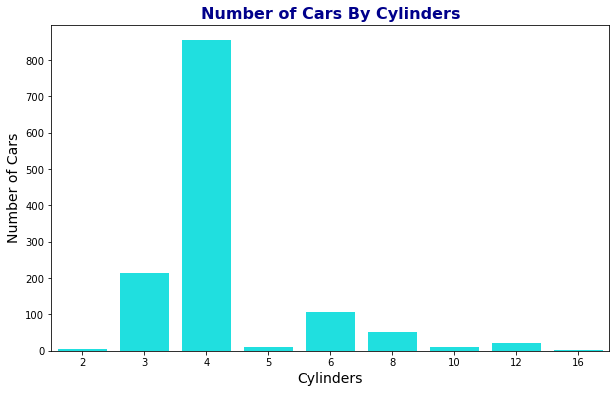

In [18]:
filename = 'Images/numcars_by_cylinder_wo.png'
title = 'Number of Cars By Cylinders'
xlabel = 'Cylinders'
ylabel = 'Number of Cars'

DrawCountPlot(automobile, 'Cylinders', (10,6), xlabel, ylabel, title, filename)

##### Observations:

- Slightly over 2/3rd of the cars have 4 cylinders. 
- Only a few cars have 2 or 16 cylinders. This probably is because 2 cylinder engines are too outdated and 16 cylinder engines are too advanced to be produced at the moment.

#### What is the Emission Norm of most cars?

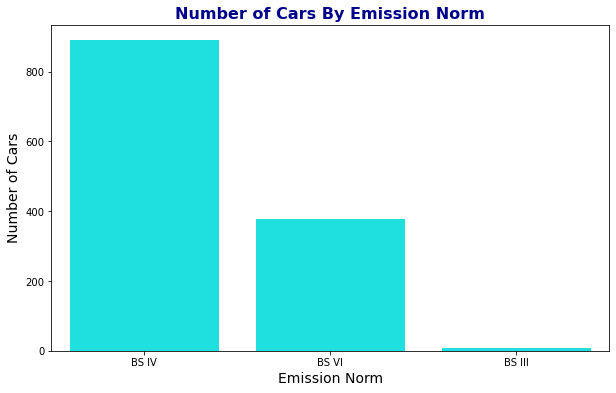

In [19]:
filename = 'Images/numcars_by_emnorm_wo.png'
title = 'Number of Cars By Emission Norm'
xlabel = 'Emission Norm'
ylabel = 'Number of Cars'

DrawCountPlot(automobile, 'Emission_Norm', (10,6), xlabel, ylabel, title, filename)

#### Observations:

- Most cars follow the BS IV Emission Norm, followed by BS VI and BS III by a large margin.
- BS III cars were being produced largely in previous years, but due to advanced technology BS IV, BS VI cars are also being produced. 
- BS VI cars are being increasingly produced and in a few years, they might become the next norm.

#### How many gears do most cars have?

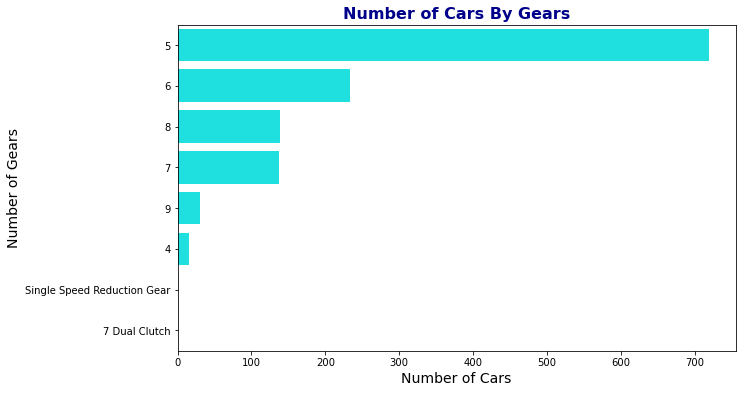

In [20]:
filename = 'Images/numcars_by_gears_wo.png'
title = 'Number of Cars By Gears'
xlabel = 'Number of Cars'
ylabel = 'Number of Gears'

DrawBarPlot(automobile, 'Gears', xlabel, ylabel, title, filename)

#### Observations:

- Most cars have 5 gears.
- Cars with 6,7,8 gears are also being produced increasingly.
- Close to nil cars have Single Speed Reduction Gear or 7 Dual Clutch Gear.


#### What is the distribution of cars with Body Type?

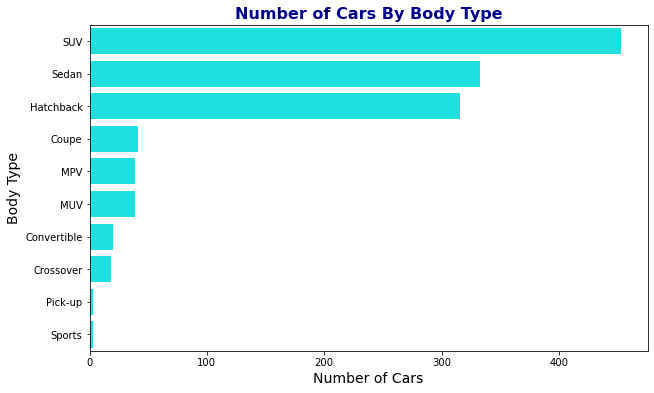

In [21]:
filename = 'Images/numcars_by_bodytype_wo.png'
title = 'Number of Cars By Body Type'
xlabel = 'Number of Cars'
ylabel = 'Body Type'

DrawBarPlot(automobile, 'Body_Type', xlabel, ylabel, title, filename)

####  Let us take a look at all the continuous attributes in the given dataset

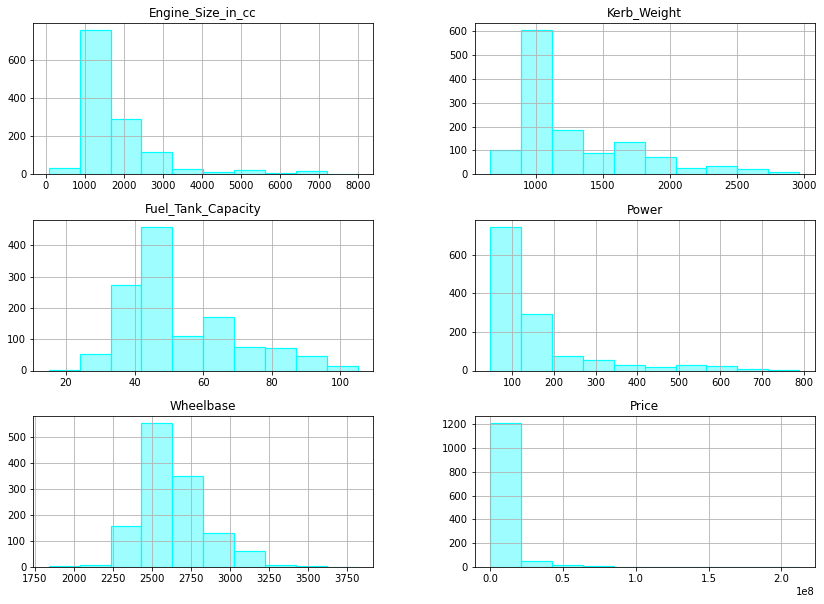

In [22]:
fig, ax = plt.subplots(figsize=(14,10), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

automobile[['Engine_Size_in_cc','Kerb_Weight','Fuel_Tank_Capacity','Power', 'Wheelbase', 
            'Price']].hist(color='#9efdff', ax=ax, edgecolor=plot_color, linewidth=1.2)
plt.show()

fig.savefig('Images/car_features_wo.png',dpi=fig.dpi,bbox_inches='tight')

##### Let us remove the outliers by Price from the dataframe and then take a look at the data.

In [23]:
auto = automobile[automobile['Price'] <= 3*automobile['Price'].mean()]

In [24]:
auto.shape

(1174, 46)

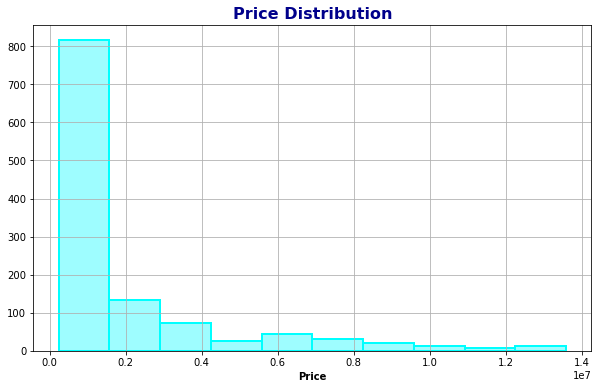

In [25]:
fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

auto['Price'].hist(color = '#9efdff', ax = ax, edgecolor=plot_color, linewidth=2)
ax.set_title('Price Distribution', color=title_color, fontsize = 16, fontweight='bold')
ax.set_xlabel('Price', fontweight='bold')
plt.show()

fig.savefig('Images/car_price_woo.png',dpi=fig.dpi,bbox_inches='tight') #woo stands for without outliers

#### Let us try to analyze how the number of cars depend upon make and body style

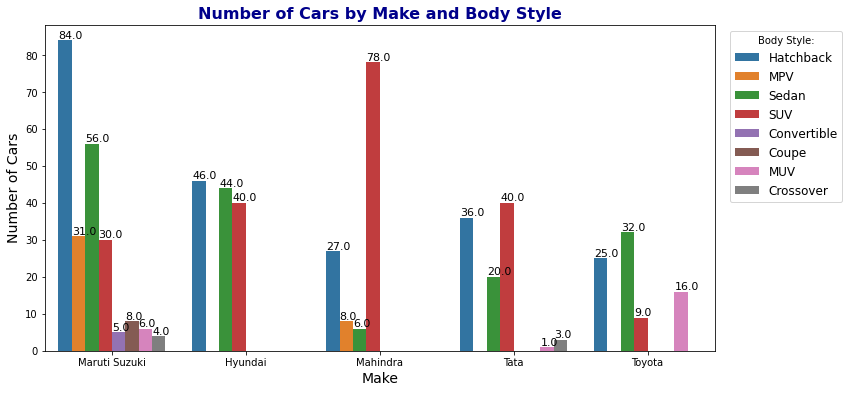

In [26]:
top_5_makers = automobile["Make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Number of Cars by Make and Body Style", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
symbol_dist = sns.countplot(data=automobile[automobile['Make'].isin(maker_cols)], order=maker_cols, 
                            x="Make", hue="Body_Type", ax=ax)

symbol_dist.set_ylabel('Number of Cars', fontsize=14 )
symbol_dist.set_xlabel('Make', fontsize=14)
symbol_dist.legend(title="Body Style:", loc="upper right", fontsize="12", bbox_to_anchor=(1.2,1))
fig.savefig('Images/numcars_by_makebodystyle_wo.png',dpi=fig.dpi,bbox_inches='tight')

for p in symbol_dist.patches:
    symbol_dist.annotate(format(p.get_height()), (p.get_x(), p.get_height()), fontsize=11, ha='left', va='bottom')

##### Inferences:

- Maruti Suzuki produces models of various Body Types like SUVs, Coupes, Convertibles etc.
- Maruti Suzuki produces most Hatchbacks followed by Sedan.
- Mahindra produces most SUVs. It produces almost double the number of SUVs than Tata and Hyundai.
- Very few Coupes are produced by the top car production companies.

#### Let us analyze the relationship between Make of the car by Type

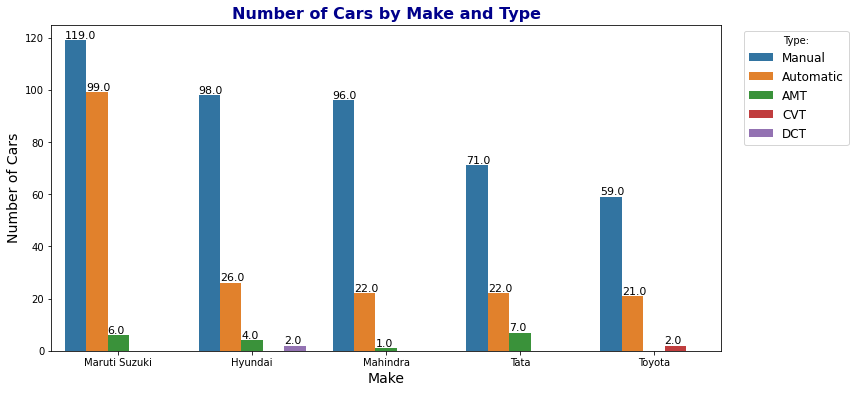

In [27]:
top_5_makers = automobile["Make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Number of Cars by Make and Type", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
symbol_dist = sns.countplot(data=automobile[automobile['Make'].isin(maker_cols)], order=maker_cols, 
                            x="Make", hue="Type", ax=ax)

symbol_dist.set_ylabel('Number of Cars', fontsize=14 )
symbol_dist.set_xlabel('Make', fontsize=14)
symbol_dist.legend(title="Type:", loc="upper right", fontsize="12", bbox_to_anchor=(1.2,1))
fig.savefig('Images/numcars_by_maketype_wo.png',dpi=fig.dpi,bbox_inches='tight')

for p in symbol_dist.patches:
    symbol_dist.annotate(format(p.get_height()), (p.get_x(), p.get_height()), fontsize=11, ha='left', va='bottom')

##### Conclusions:

- Maruti Suzuki produces most Automatic cars. It also produces the most cars.
- Maruti Suzuki produces about 300% more Automatic cars than Hyundai, Mahindra, Tata and Toyota.

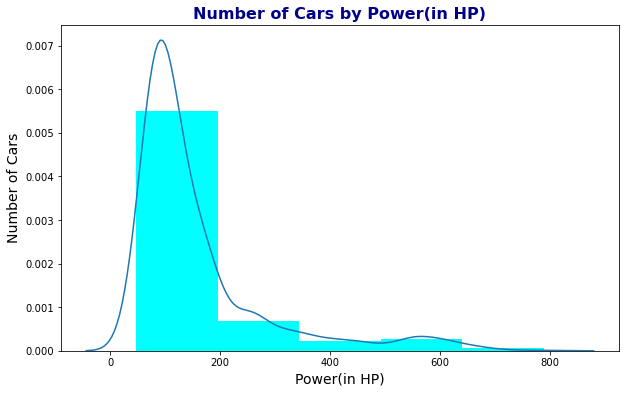

In [28]:
filename = 'Images/numcars_by_power_wo.png'
title = 'Number of Cars by Power(in HP)'
xlabel = 'Power(in HP)'
ylabel = 'Number of Cars'

DrawDistPlot(automobile, 'Power', xlabel, ylabel, title, filename, 5, True)

##### Here we construct the correlation coefficient matrix of numeric columns in the given dataset to understand how much various attributes depend upon each other.

###### In particular , we try to understand dependence of Price on other attributes.

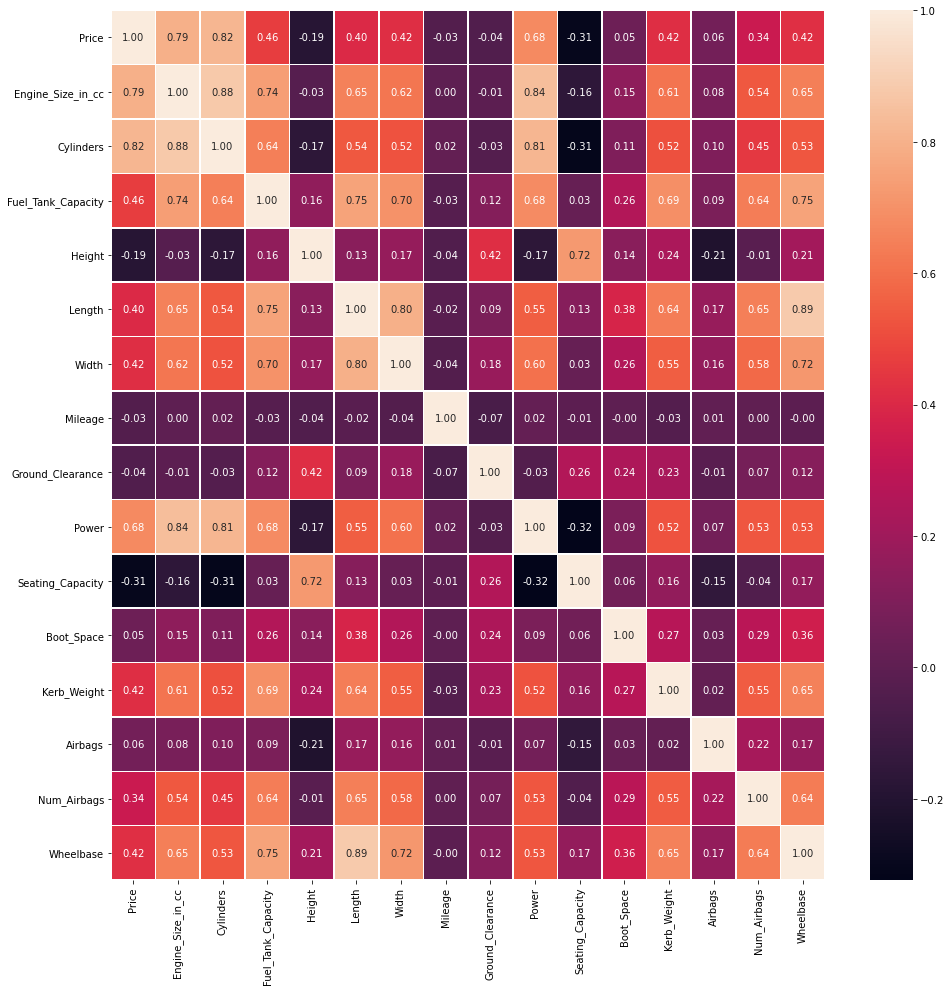

In [29]:
corr = automobile.corr()
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.6)
plt.savefig('Images/cars_corr_matrix_wo.png', bbox_inches='tight')

We observe that Price shows strong positive correlation with Engine Size, Cylinders, Fuel Tank Capacity, Length, Width, Power, Kerb Weight, Number of Airbags and Wheelbase.

Price is negatively correlated with Mileage, Seating Capacity, Ground Clearance and Height.

Let us explore the relationship between these attributes in further detail.

For the same, we graph a pairplot between Kerb Weight, Engine Size, Power and Price as a starting point.

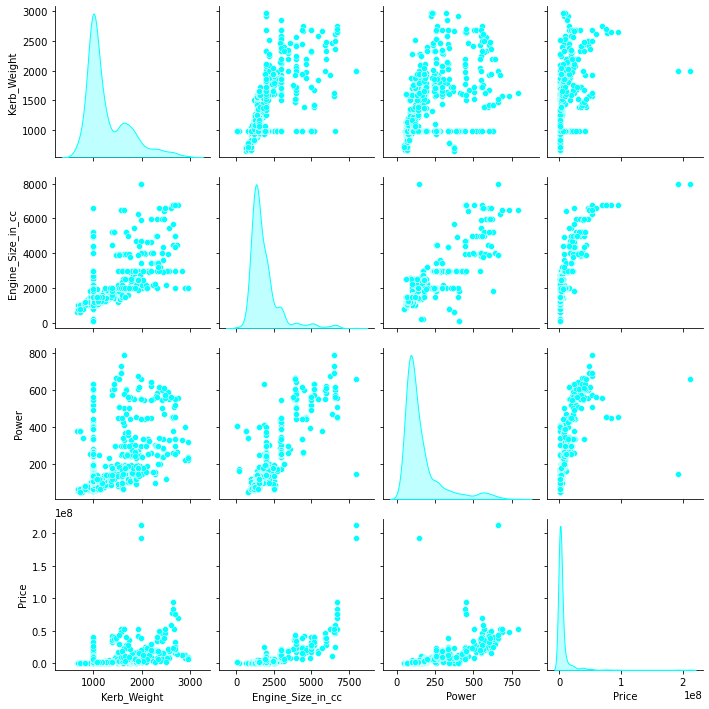

In [30]:
cols = ['Kerb_Weight','Engine_Size_in_cc', 'Power','Price']
filename = "Images/cars_size_power_price_weight_wo.png"
DrawPairPlot(automobile[cols], "scatter", "kde", filename)

It can be seen that the Price attribute has some outliers which are quite faraway from the mean. Let us graph the same plot on this data after removing outliers.

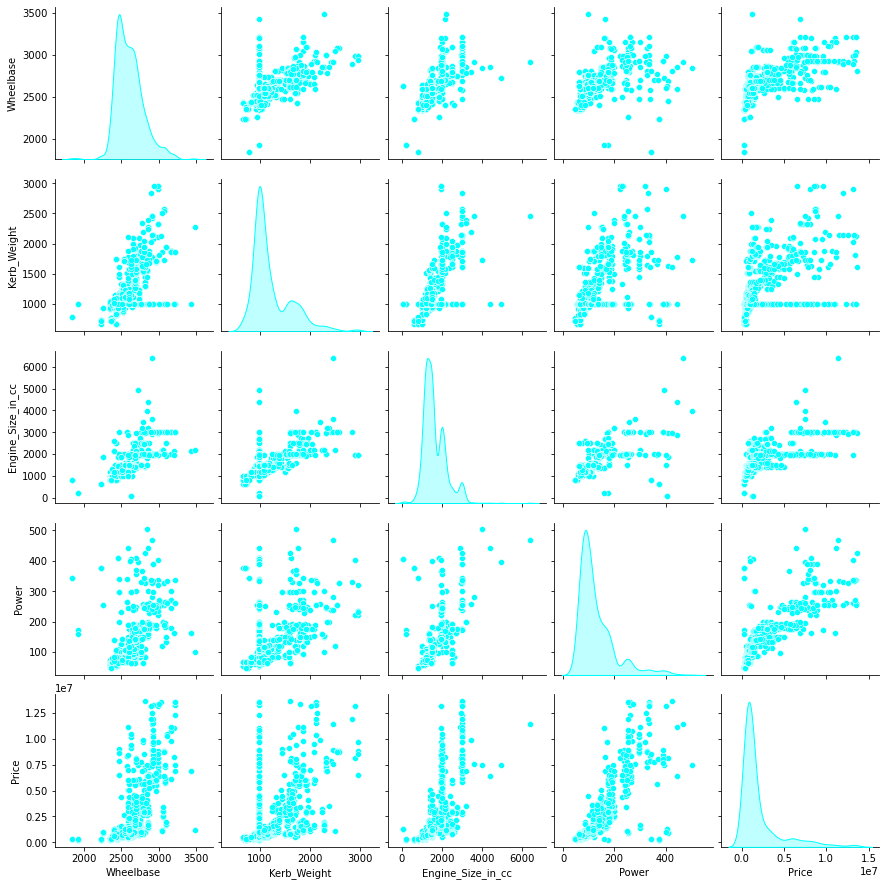

In [31]:
cols = ['Wheelbase', 'Kerb_Weight','Engine_Size_in_cc', 'Power','Price']
filename = "Images/cars_size_power_price_weight_woo.png"
DrawPairPlot(auto[cols], "scatter", "kde", filename)

Price seems linearly dependent on Power and shows slight linear dependency on other attributes for considerable samples.

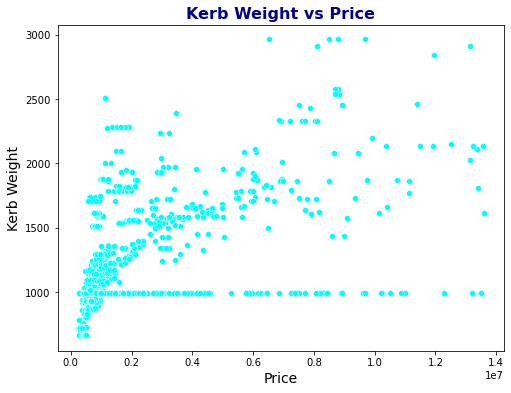

In [32]:
plot_title = "Kerb Weight vs Price"
xlabel = "Price"
yLabel = "Kerb Weight"
filename = "Images/cars_weight_price.png"

ax = DrawScatterPlot(auto, "Price", "Kerb_Weight", (8,6), 
                     plot_color, plot_title, xlabel, yLabel, filename)

- Price and Kerb weight show a linear relationship till 2,000,000 INR for price. 
- The slope is high.

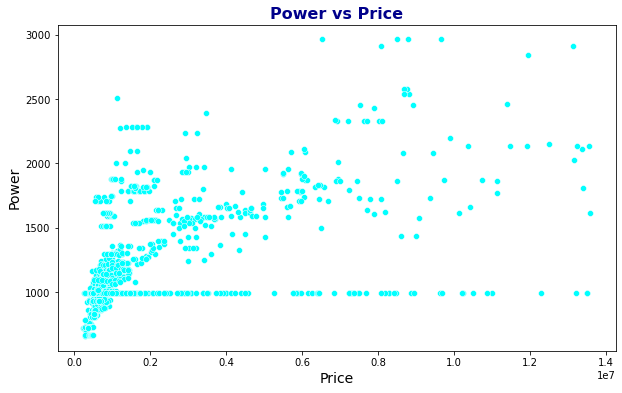

In [33]:
plot_title = "Power vs Price"
xlabel = "Price"
yLabel = "Power"
filename = "Images/cars_weight_price.png"

ax = DrawScatterPlot(auto, "Price", "Kerb_Weight", (10, 6), 
                     plot_color, plot_title, xlabel, yLabel, filename)

- Price and Kerb weight show a linear relationship till 2,000,000 INR for price. 
- The slope is high.

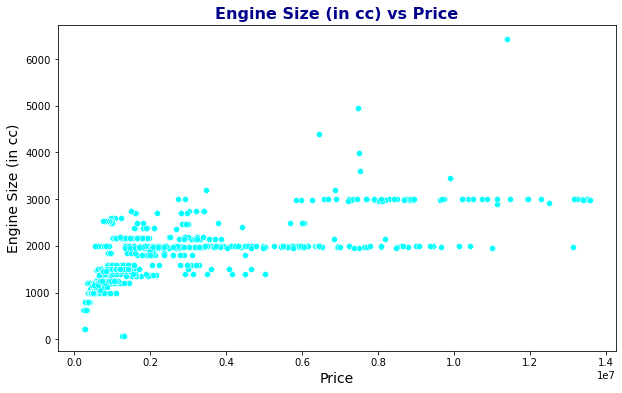

In [34]:
plot_title = "Engine Size (in cc) vs Price"
xlabel = "Price"
yLabel = "Engine Size (in cc)"
filename = "Images/disp_vs_price.png"

ax = DrawScatterPlot(auto, "Price", "Engine_Size_in_cc", (10, 6), plot_color, 
                     plot_title, xlabel, yLabel, filename)

- Price and Engine size show a linear relationship till 4,000,000 INR for price. 
- The slope is high.

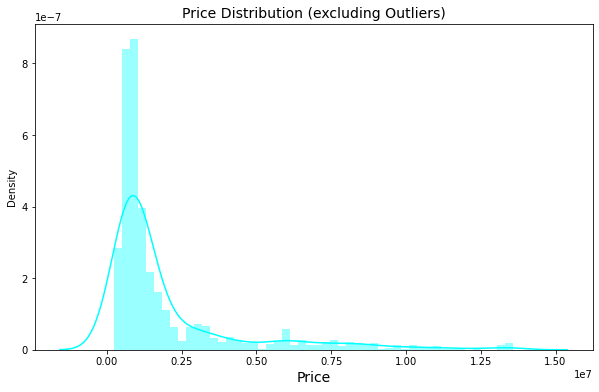

In [35]:
fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

price_dist = sns.distplot(auto["Price"], hist=True, color=plot_color, ax=ax);
ax.set_xlabel('Price',fontsize=14)
ax.set_title('Price Distribution (excluding Outliers)', fontsize=14)

fig.savefig('Images/price_dist_woo.png',dpi=fig.dpi,bbox_inches='tight')

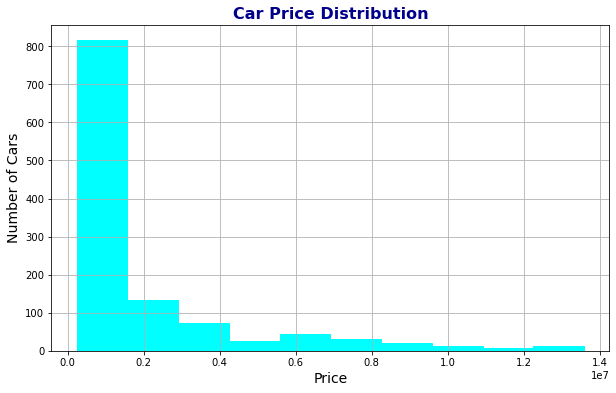

In [36]:
fig, ax = plt.subplots(figsize=(10, 6), ncols=1, nrows=1)
fig.patch.set_alpha(0.1)

price_dist = auto['Price'].hist(color=plot_color, ax=ax, edgecolor=plot_color, linewidth=1)

ax.set_title(label="Car Price Distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Cars',fontsize=14 )
ax.set_xlabel('Price',fontsize=14)

plt.show()

fig.savefig('Images/price_hist_woo.png',dpi=fig.dpi,bbox_inches='tight')

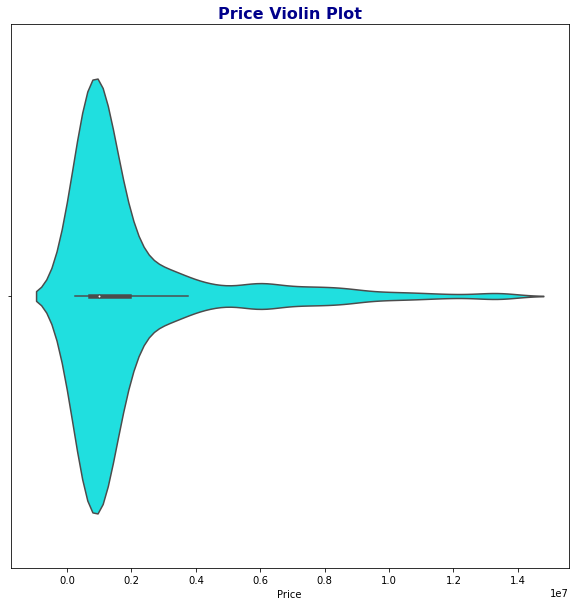

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))  

sns.violinplot(auto['Price'], color='aqua')
ax.set_title(label="Price Violin Plot", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")

plt.savefig('Images/price_violinplot.png', bbox_to_inches='tight')

In [38]:
# Let us remove the outliers in Length

auto3 = auto[auto['Length'] >= 1000]

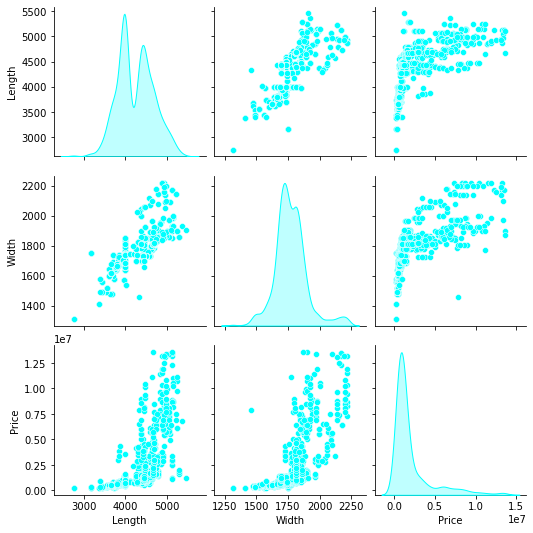

In [39]:
cols = ['Length','Width','Price']
filename = "Images/cars_bodysize_woo.png"
DrawPairPlot(auto3[cols], "scatter", "kde", filename)

##### Findings:

- It can be seen that Price seems linearly dependent on Length and Width in a certain span. 
- The slope for both seems high

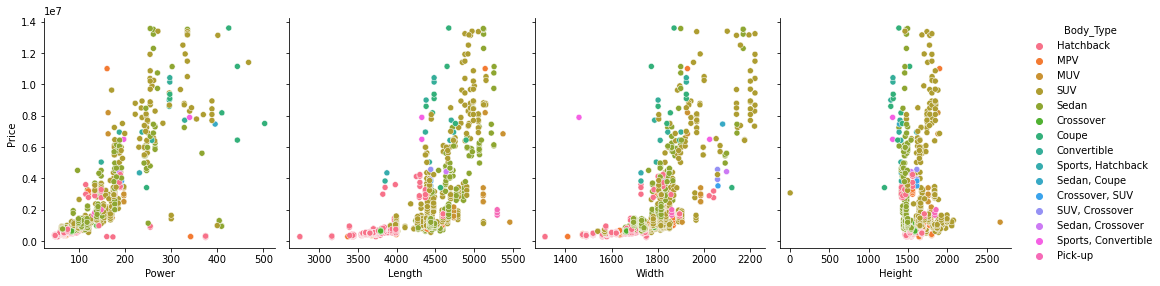

In [40]:
body_price_plot =  sns.pairplot(auto3, 
             size=4, aspect=0.9, 
             x_vars=['Power','Length','Width','Height'],
             y_vars=["Price"], 
             kind='scatter',
             hue="Body_Type")

plt.savefig('Images/bodysize_power_price_woo.png', dpi=fig.dpi,bbox_inches='tight')

##### We conclude from the above two graphs that Price is linearly dependent on Price, Length, Width but it is not dependent on height in any way.

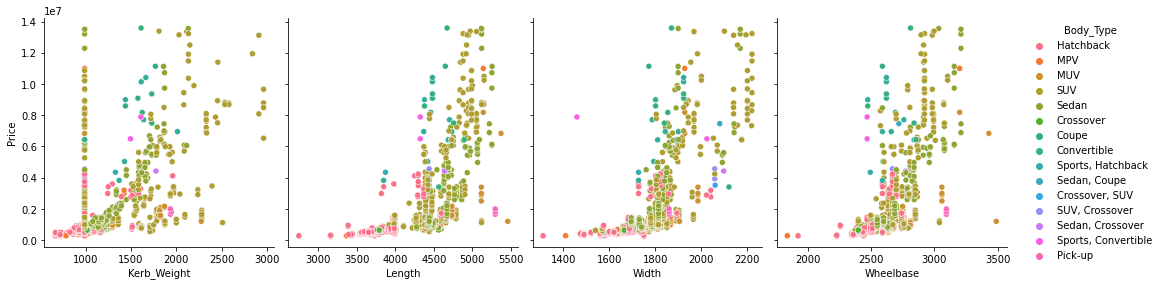

In [41]:
body_price_plot =  sns.pairplot(auto3, 
             size=4, aspect=0.9, 
             x_vars=['Kerb_Weight','Length','Width','Wheelbase'],
             y_vars=["Price"], 
             kind='scatter',
             hue="Body_Type")

plt.savefig('Images/bodyweight_price_woo.png', dpi=fig.dpi,bbox_inches='tight')

##### Which models have the highest mean Price?

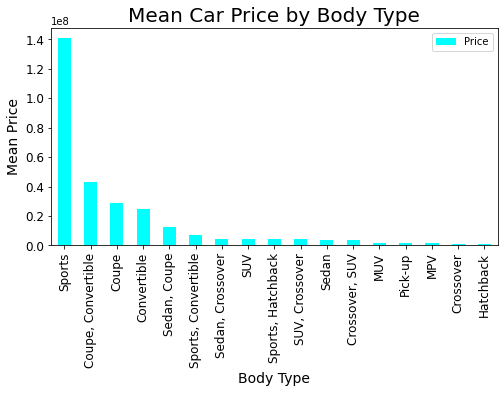

In [42]:
mean_car_prices = automobile.groupby(by="Body_Type")["Price"].mean().sort_values(ascending=False).reset_index()

ax = mean_car_prices.plot.bar(
    x="Body_Type", 
    y="Price",
    figsize=(8, 4),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean Car Price by Body Type", fontsize=20)
ax.set_ylabel('Mean Price',fontsize=14 )
ax.set_xlabel('Body Type',fontsize=14)

plt.savefig('Images/meanprice_by_bodytype.png', bbox_inches='tight')

##### Observation:

- Sports cars have the highest mean, exceeding second highest mean by about 250%.
- Coupe and Convertible cars have the next highest mean. 
- Hatchback and Crossover cars have the lowest mean.

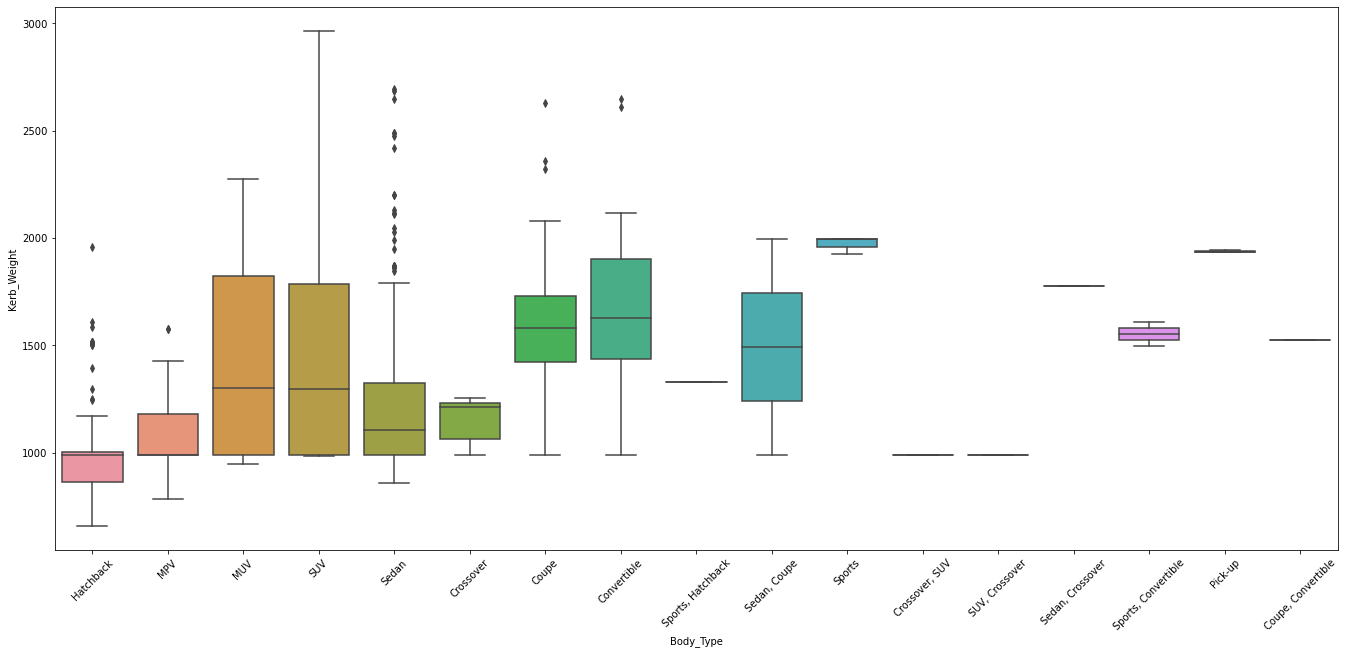

In [43]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Body_Type", y="Kerb_Weight", data = automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('Images/weight_by_bodytype.png', bbox_to_inches='tight')

##### Observations:

- Hatchbacks are the lighest cars with lowest mean Kerb Weight.
- Sports cars have the highest mean Kerb Weight. 
- SUVs are highly spread over Kerb Weight.

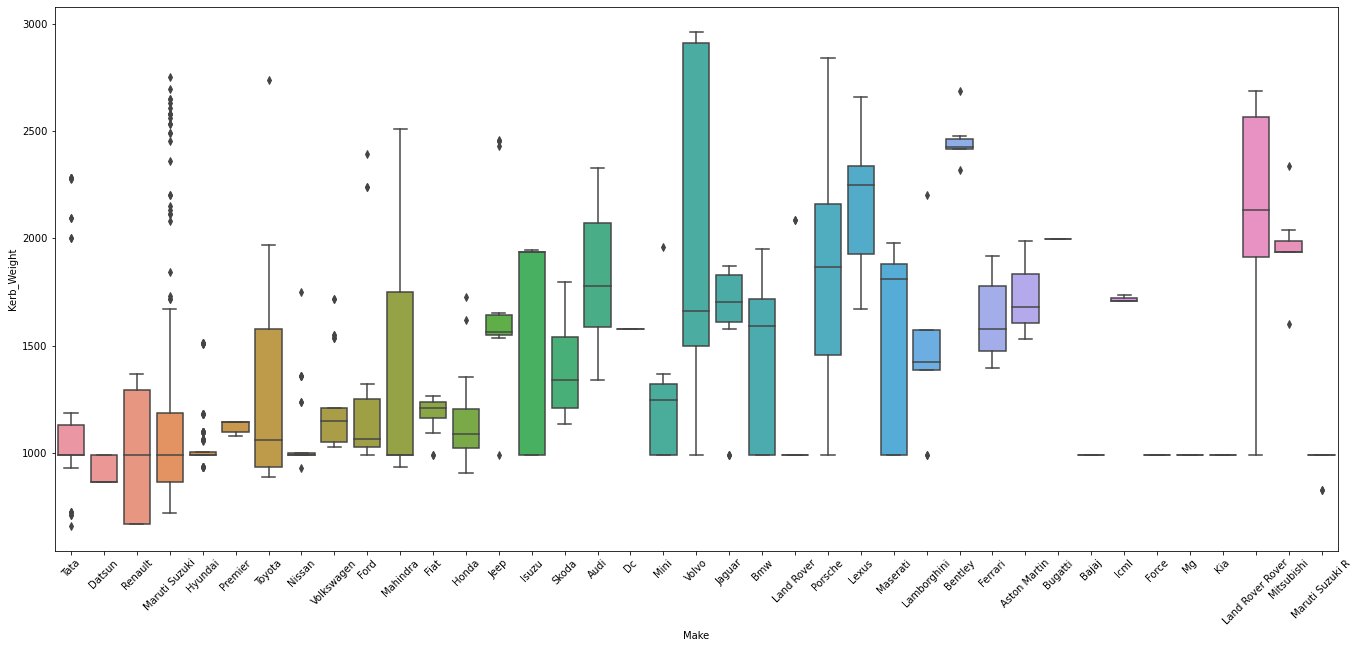

In [44]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Make", y="Kerb_Weight", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('Images/weight_by_make.png', bbox_to_inches='tight')

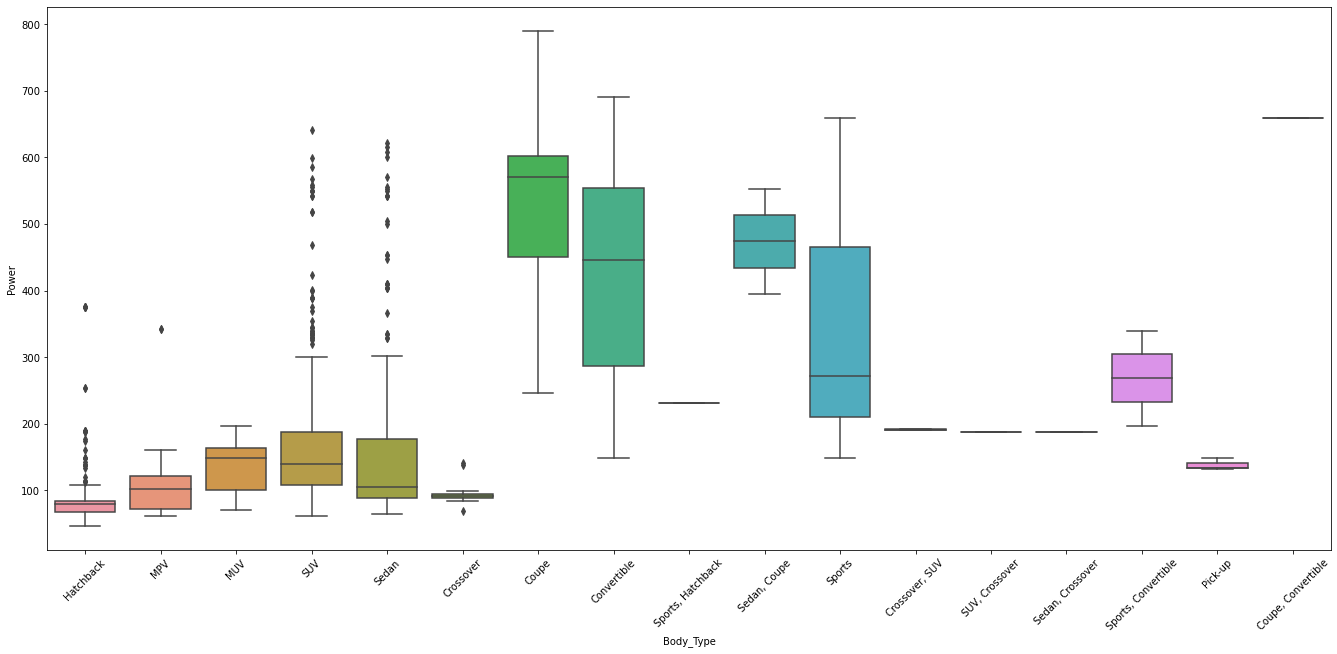

In [72]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Body_Type", y="Power", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('Images/power_by_bodytype.png', dpi=fig.dpi, bbox_inches='tight')

##### Observations:

- Couple & Convertibles have some of the highest mean Power.
- Hatchbacks and Crossovers have the least mean Power

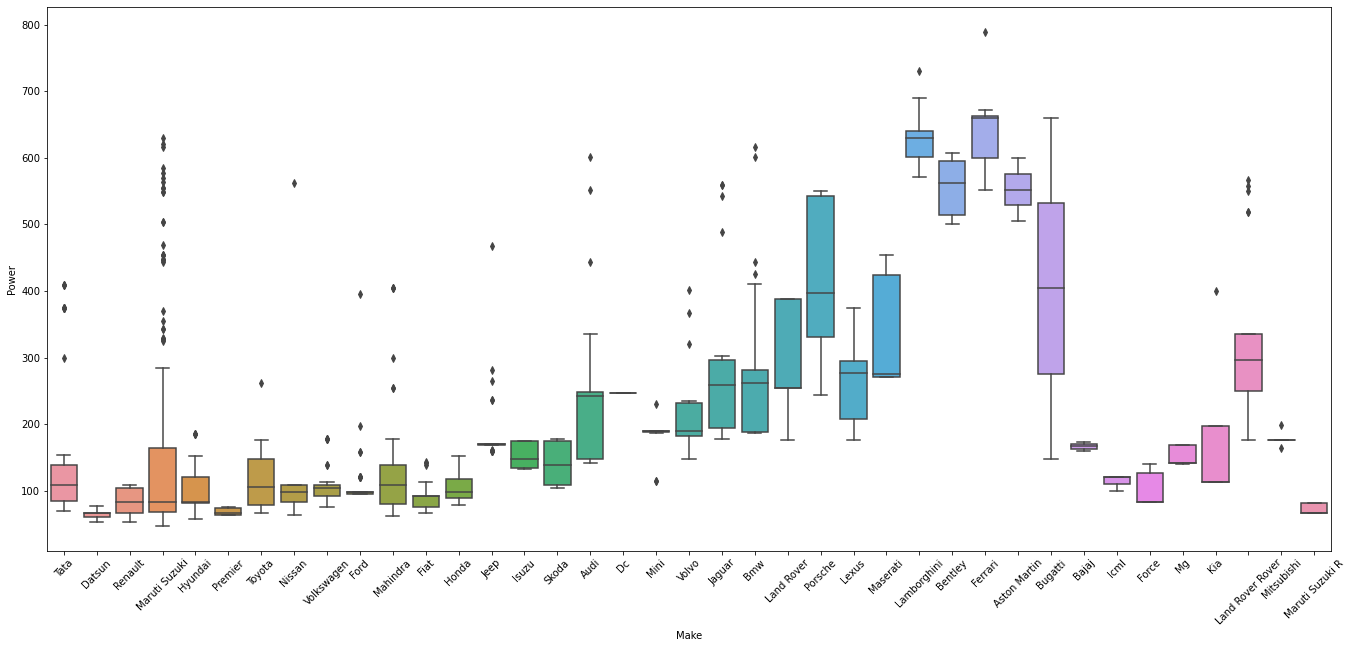

In [45]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Make", y="Power", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('Images/power_by_make.png', dpi=fig.dpi, bbox_inches='tight')

##### Observations:

- Companies like Lamborghini, Bentley, Ferrari, Aston Martin, Porsche and Bugatti produce cars with the highest mean Power.
- Tata, Datsun, Ford and Fiat cars are some companies with lowest mean Power.
- Maruti Suzuki produces cars with a large spread in Power (outliers).

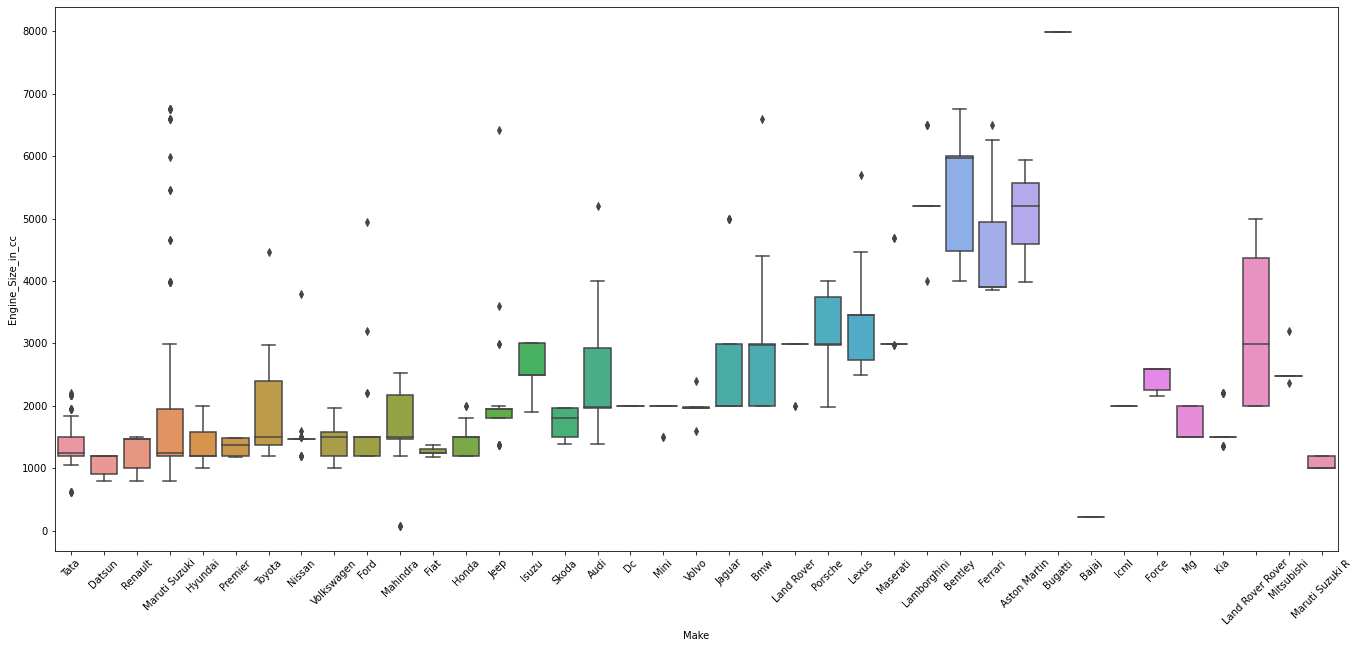

In [46]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Make", y="Engine_Size_in_cc", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('Images/enginesize_by_make.png', bbox_to_inches='tight')

##### Observations: 

- Bugatti has the highest engine size.
- It is followed by Lamborghini, Bentley, Ferrari and Aston Martin.
- Some of the brands with least engine size are Bajaj and Datson.
- Rest cars have close engine sizes.

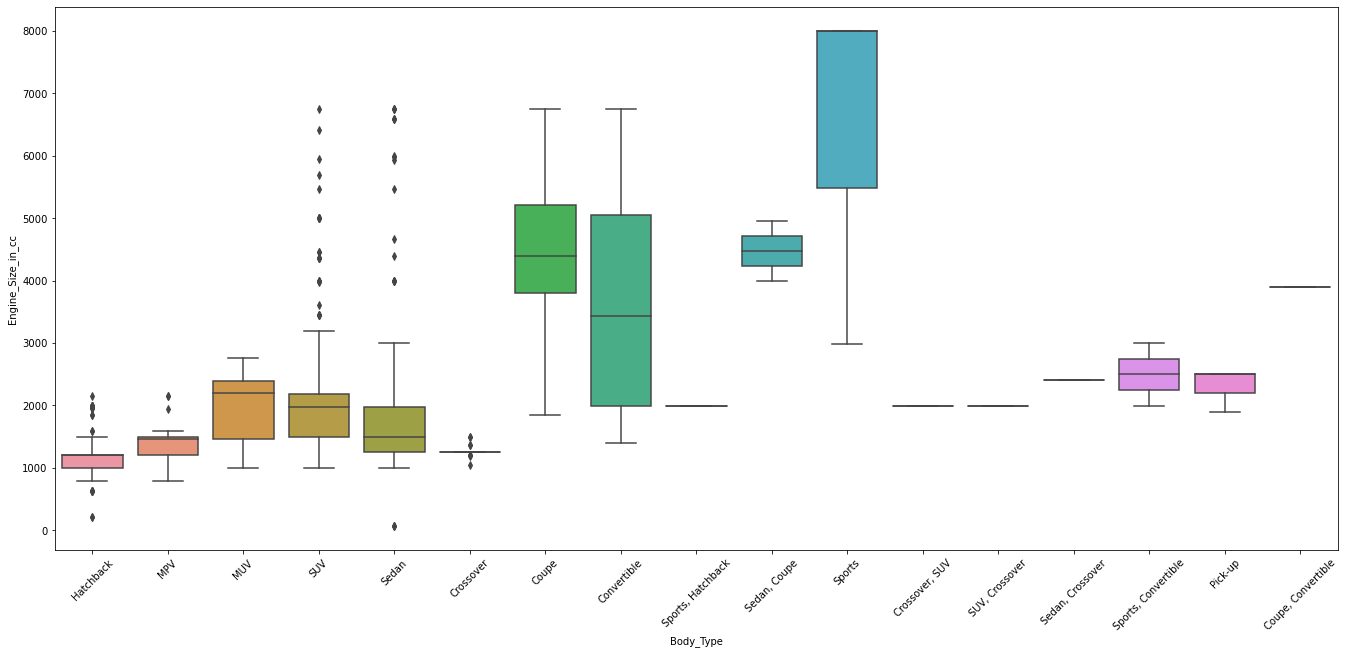

In [47]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Body_Type", y="Engine_Size_in_cc", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.savefig('Images/enginesize_by_bodytype.png', dpi=fig.dpi, bbox_inches='tight')

##### Inferences:

- Sports cars have the highest mean engine size. 
- Hatchbacks and Crossovers have the least mean engine sizes.
- SUVs are available in various engine sizes.
- Convertibles have a large spread. 

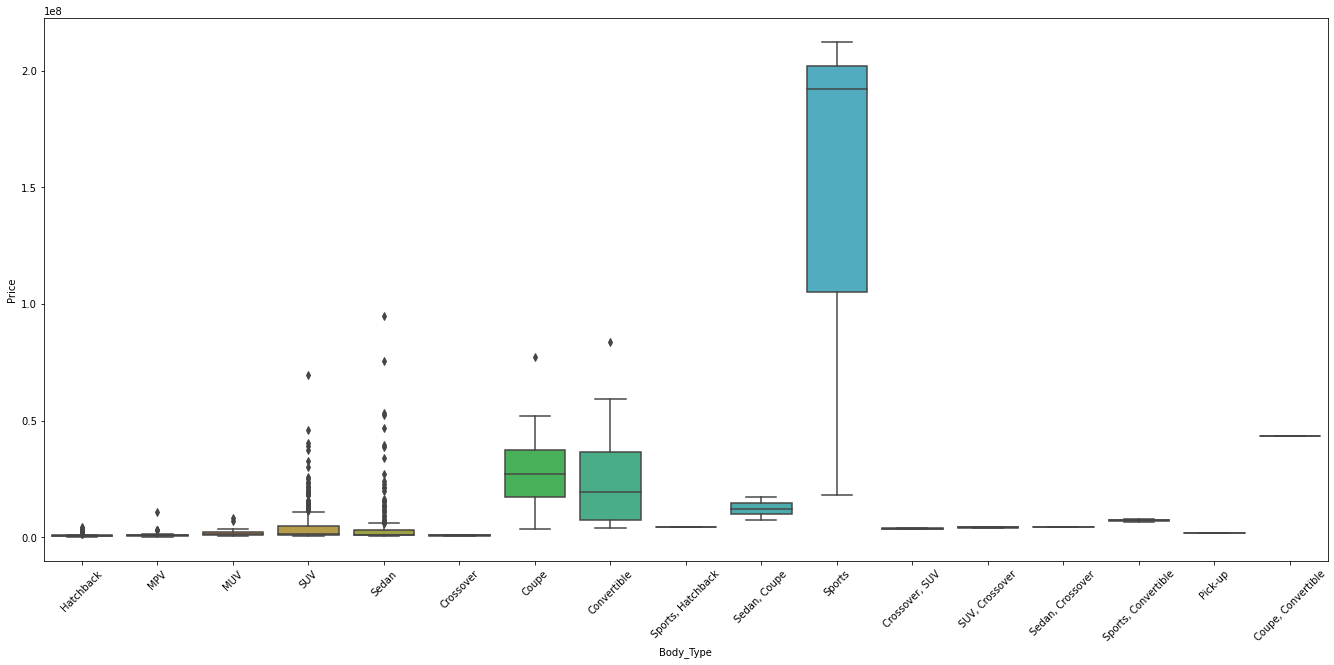

In [48]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Body_Type", y="Price", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

plt.savefig('Images/price_by_bodytype.png', bbox_to_inches='tight')

##### Observations :

- Sports cars are the most expensive cars. They have a huge spread, so they are available in several prices. Even then they have the highest mean Price.
- Hatchbacks, Crossovers and Pickups have the least mean Price.

Let us remove the outliers in price and try to understand the Price distribution in detail.

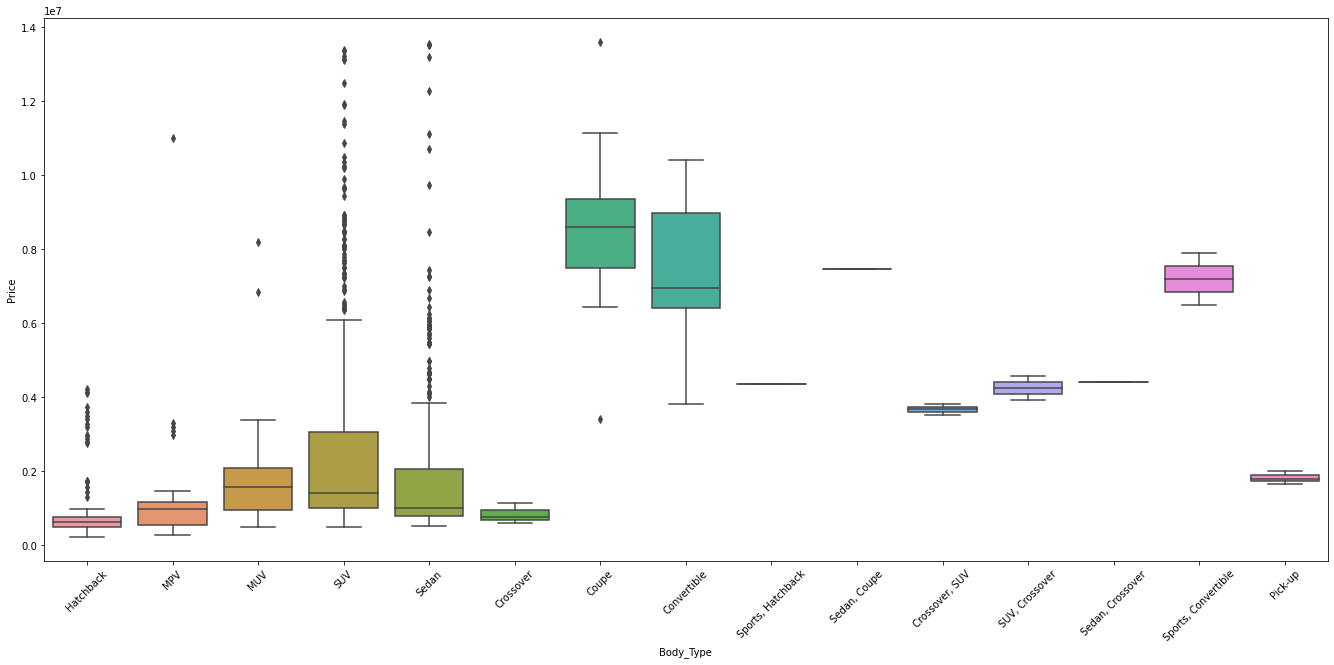

In [49]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Body_Type", y="Price", data=auto)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

plt.savefig('Images/price_by_bodytype_woo.png', bbox_to_inches='tight')

- After removing the outliers, we notice that Sports cars have vanished.
- SUVs are available in several prices from some of the highest to lowest.
- Coupes and convertibles come after Sports cars in terms of Price.

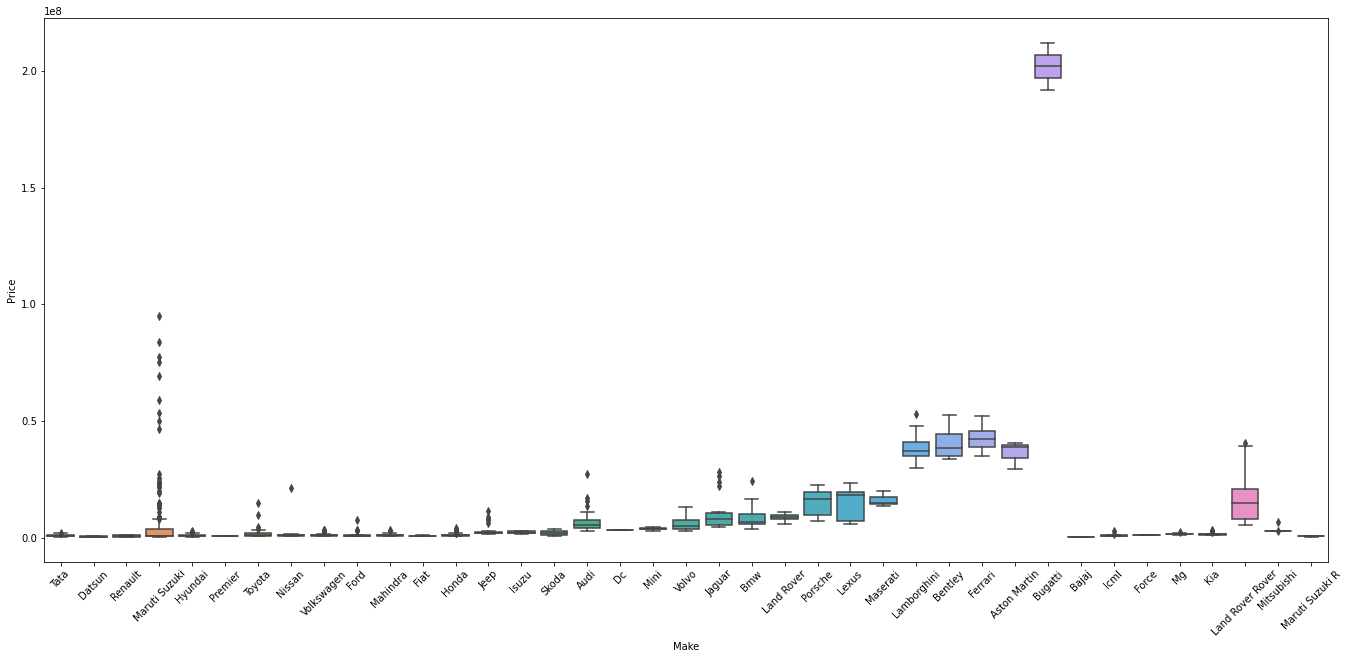

In [50]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Make", y="Price", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

plt.savefig('Images/price_by_make.png', bbox_to_inches='tight')

#### Inferences: 

- Bugatti makes the most expensive cars.
- It is followed by other luxury cars brands like Lamborghini, Bentley, Ferrari and Aston Martin.
- Maruti Suzuki produces cars with several prices. It covers a large price range.

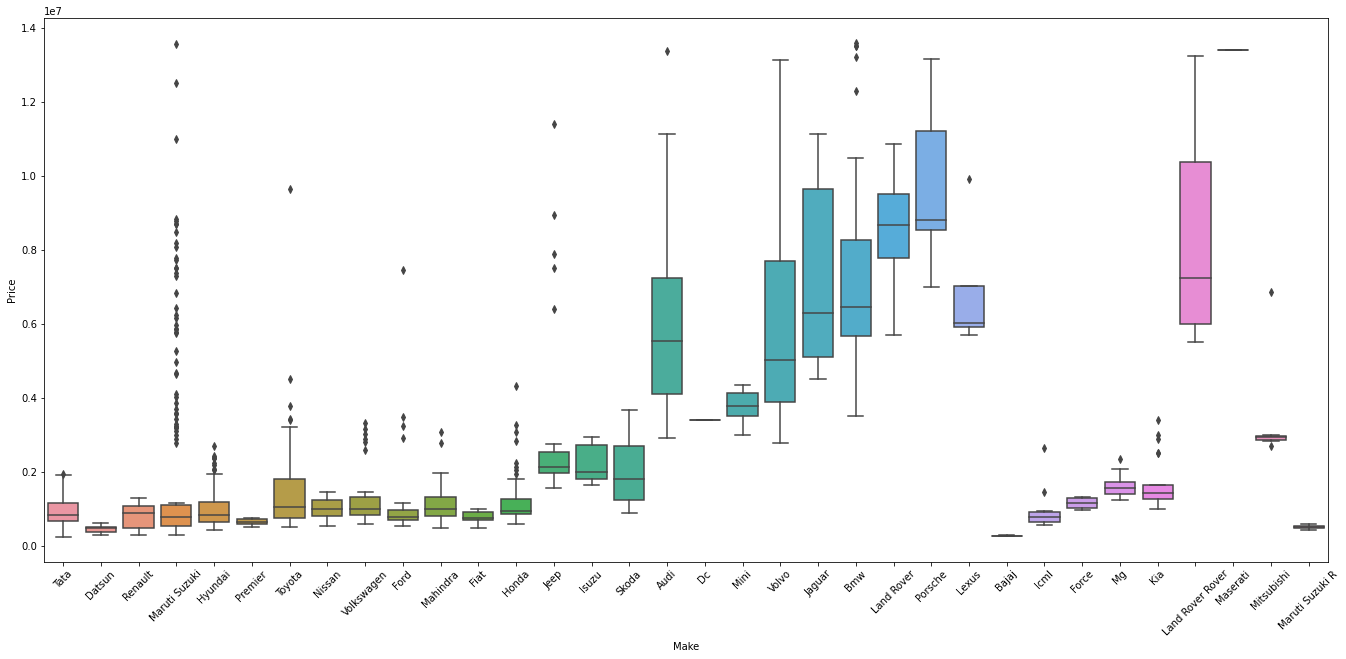

In [51]:
plt.rcParams['figure.figsize']=(23,10)

ax = sns.boxplot(x="Make", y="Price", data=auto)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

plt.savefig('Images/price_by_make_woo.png', bbox_to_inches='tight')

#### After removing the outliers, we observe that :

- Next costliest cars are Jaguar, BMW Land Rocer, Porsche and Maserati.
- Companies like Hyundai, Toyota, Nissan, Volkswagen, Ford, Mahindra etc. are low priced car brands. 

Let us remove the outliers in Mileage and try to understand relationship between Mileage and Power by Make.

In [52]:
auto2 = automobile[automobile['Mileage'] <= 3*automobile['Mileage'].mean()]

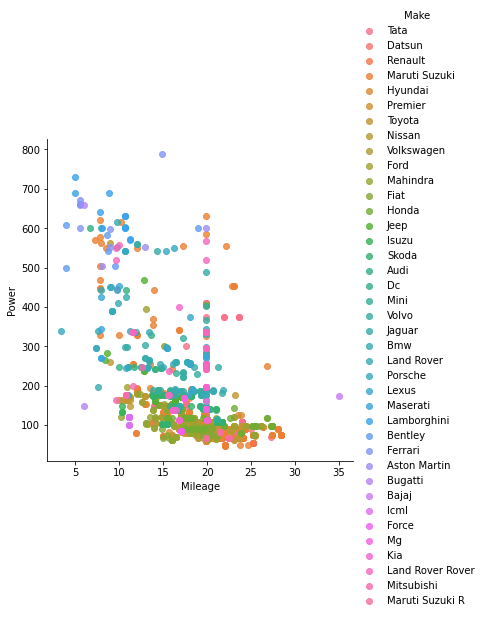

In [53]:
g = sns.lmplot("Mileage", "Power", auto2, hue= "Make",fit_reg=False)
g.savefig("Images/mlg_power_by_make_woo.png", bbox_to_inches='tight')

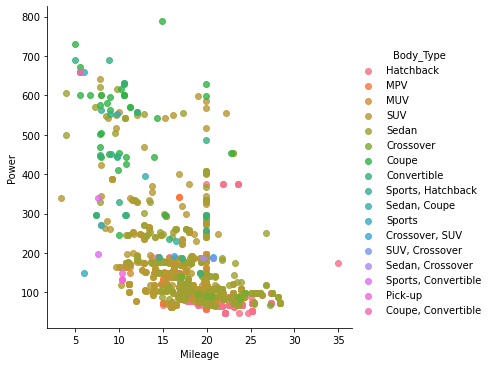

In [54]:
g = sns.lmplot("Mileage", "Power", auto2, hue= "Body_Type",fit_reg=False)
g.savefig("Images/mlg_power_by_bodytype_woo.png", bbox_to_inches='tight')

We can see from the graph that Power and Mileage are negatively related. As Power increases, Mileage decreases and vice versa.

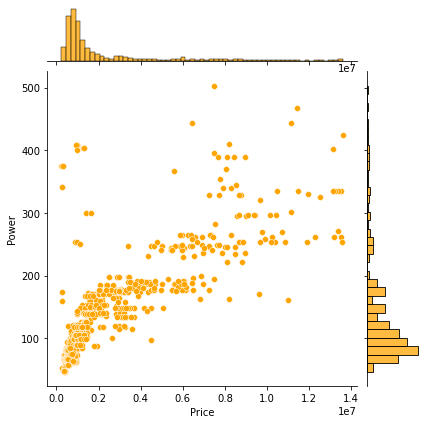

In [55]:
g2 = sns.jointplot(x = "Price", y = "Power", color = 'orange',
              kind = "scatter", data = auto)
g2.savefig("Images/price_power.png", bbox_to_inches='tight')

In [56]:
# Let us remove Price outliers in auto2

auto4 = auto2[auto2['Price'] <= 3*auto2['Price'].mean()]

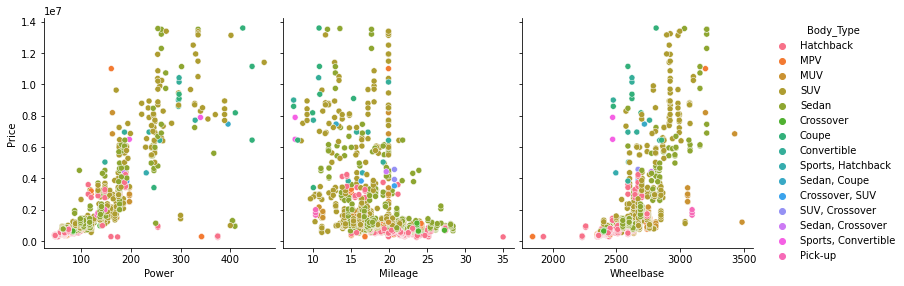

In [57]:
filename = 'Images/carspecs_price_woo.png'

body_price_plot =  sns.pairplot(auto4,
             size=4, aspect=0.9, 
             x_vars=['Power', 'Mileage', 'Wheelbase'],
             y_vars=["Price"], 
             kind='scatter',
             hue="Body_Type")

plt.savefig(filename, bbox_inches='tight')

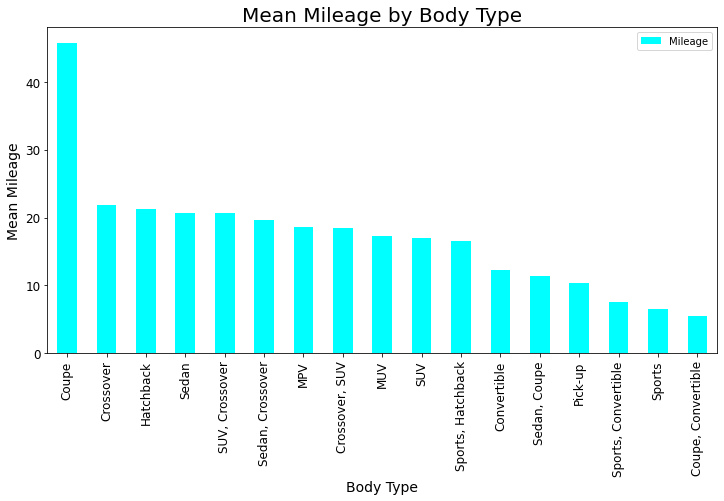

In [58]:
cars = automobile.groupby(by="Body_Type")["Mileage"].mean().sort_values(ascending=False).reset_index()

ax = cars.plot.bar(
    x="Body_Type", 
    y="Mileage",
    figsize=(12, 6),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean Mileage by Body Type", fontsize=20)
ax.set_ylabel('Mean Mileage',fontsize=14 )
ax.set_xlabel('Body Type',fontsize=14)

plt.savefig('Images/mlg_bodytype.png', bbox_inches='tight')

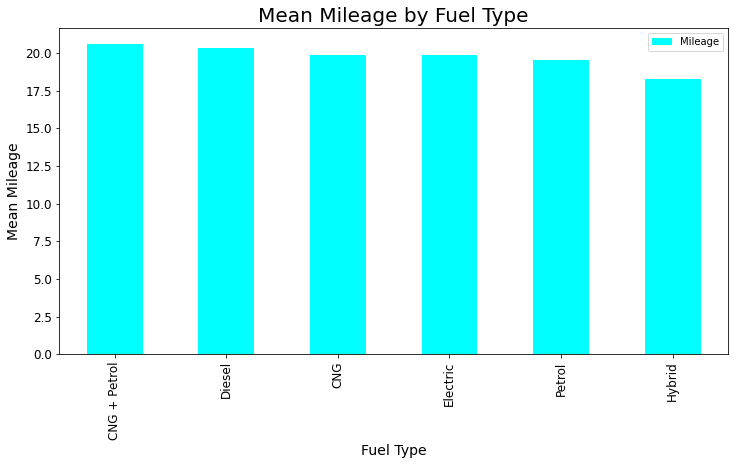

In [59]:
cars = automobile.groupby(by="Fuel_Type")["Mileage"].mean().sort_values(ascending=False).reset_index()

ax = cars.plot.bar(
    x="Fuel_Type", 
    y="Mileage",
    figsize=(12, 6),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean Mileage by Fuel Type", fontsize=20)
ax.set_ylabel('Mean Mileage',fontsize=14 )
ax.set_xlabel('Fuel Type',fontsize=14)

plt.savefig('Images/mlg_by_fueltype.png', bbox_inches='tight')

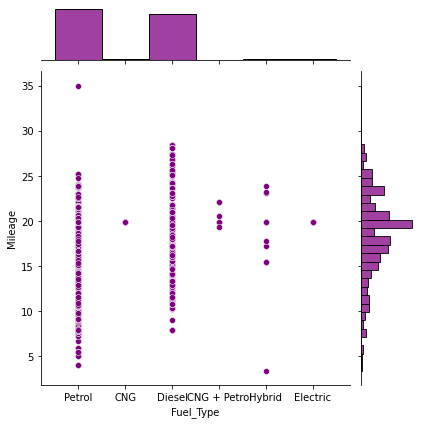

In [60]:
g3 = sns.jointplot(y = "Mileage", x = "Fuel_Type", color = 'purple', 
              kind = "scatter", data = auto2)
g3.savefig("Images/mileage_fueltype_woo.png", bbox_to_inches='tight')

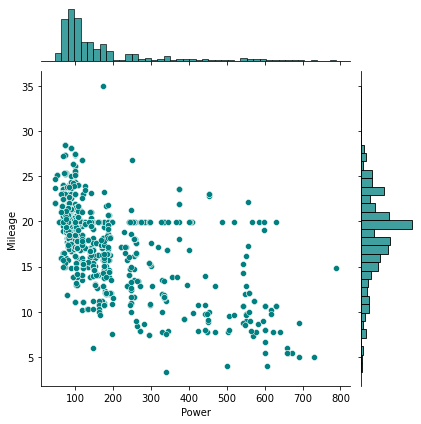

In [61]:
g3 = sns.jointplot(y = "Mileage", x = "Power", color = 'teal', 
              kind = "scatter", data = auto2)
g3.savefig("Images/power_mileage.png", bbox_to_inches='tight')

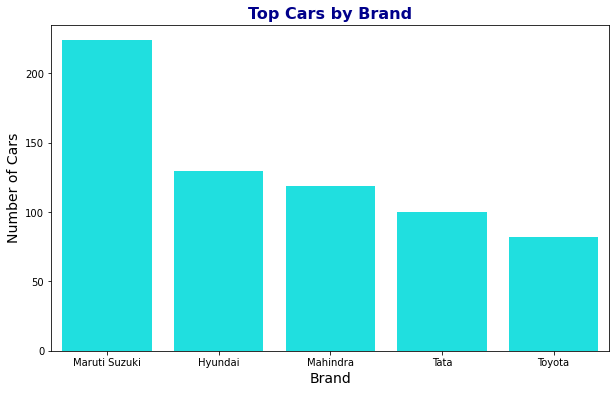

In [62]:
top_makers = automobile["Make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(10, 6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Top Cars by Brand", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=automobile[automobile.Make.isin(maker_cols)], order=maker_cols, x="Make", ax=ax, 
                         palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Number of Cars', fontsize=14 )
col_dist.set_xlabel('Brand', fontsize=14)
fig.savefig('Images/topcars_by_brand.png',dpi=fig.dpi,bbox_inches='tight')

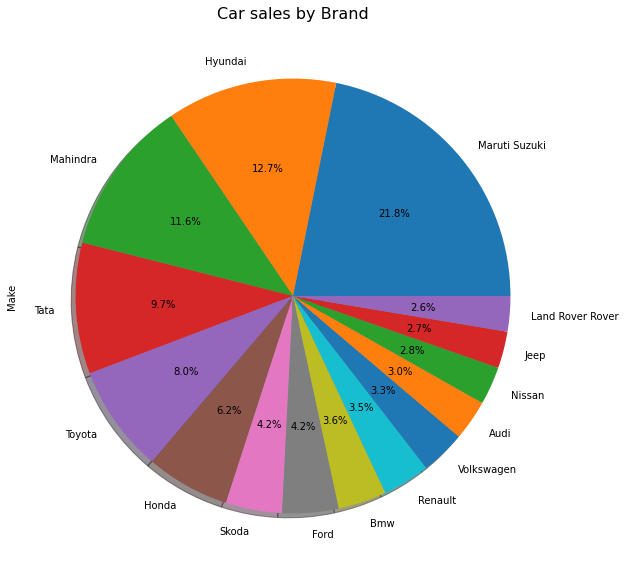

In [63]:
automobile["Make"].value_counts()[:15].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,10), radius=1)
plt.title('Car sales by Brand', fontsize=16)

plt.savefig('Images/carsales_by_brand.png', bbox_inches='tight')

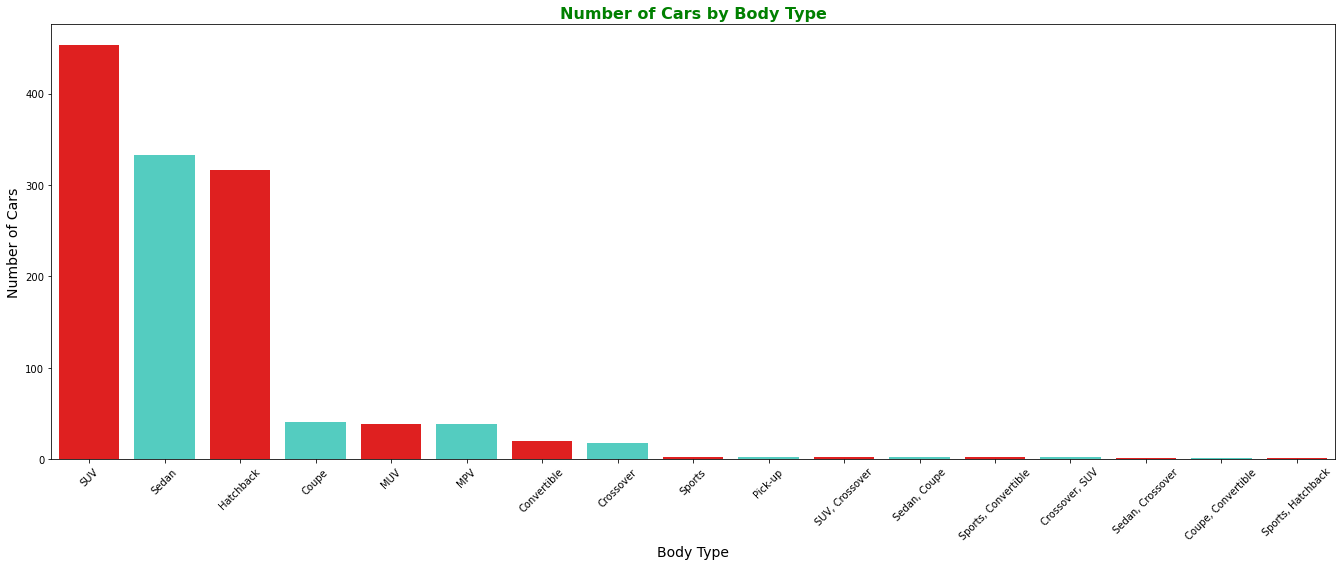

In [101]:
top_body_style = automobile["Body_Type"].value_counts().to_frame().reset_index()
maker_cols = top_body_style["index"].tolist()

fig, ax = plt.subplots(figsize=(23,8), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Number of Cars by Body Type", y = y_title_margin, color=title_color, 
             fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=automobile[automobile["Body_Type"].isin(maker_cols)], order=maker_cols, x="Body_Type", 
                         ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Number of Cars', fontsize=14 )
col_dist.set_xlabel('Body Type', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
fig.savefig('Images/topcars_by_bodytype.png',dpi=fig.dpi,bbox_inches='tight')

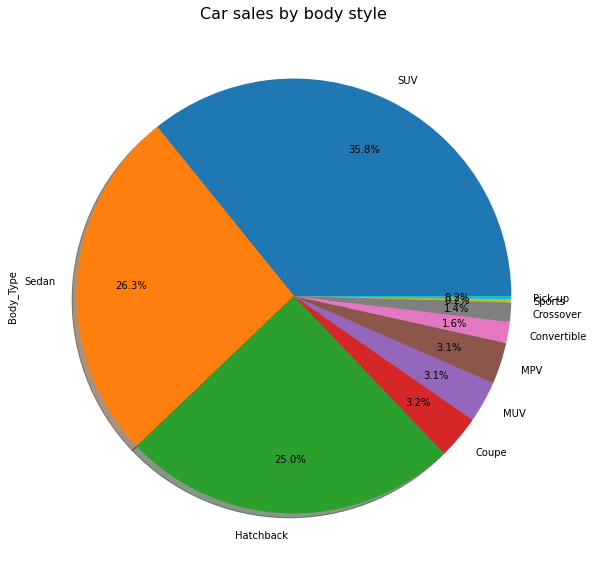

In [103]:
automobile["Body_Type"].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=True, pctdistance=0.75
                                                ,figsize=(10,10))
plt.title('Car sales by body style', fontsize=16)

plt.savefig('Images/carsales_by_bodytype.png', bbox_inches='tight')

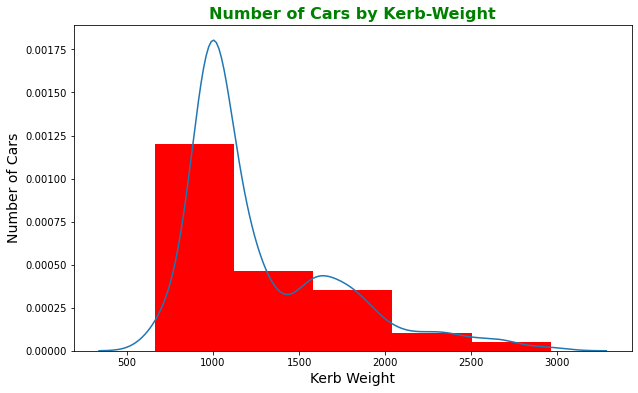

In [104]:
filename = 'Images/weight_dist.png'
title = 'Number of Cars by Kerb-Weight'
xlabel = 'Kerb Weight'
ylabel = 'Number of Cars'

DrawDistPlot(automobile, 'Kerb_Weight', xlabel, ylabel, title, filename, 5, True)

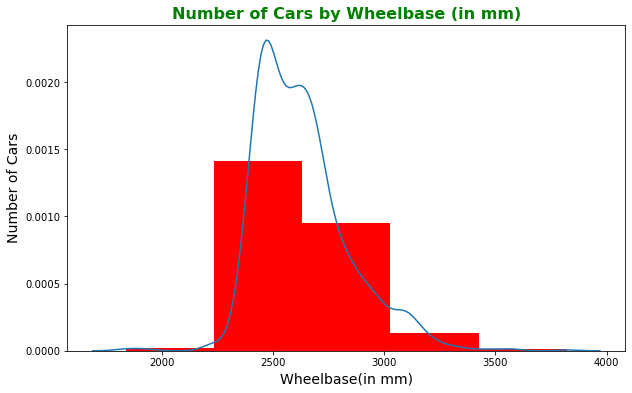

In [106]:
filename = 'Images/wheelbase_dist.png'
title = 'Number of Cars by Wheelbase (in mm)'
xlabel = 'Wheelbase(in mm)'
ylabel = 'Number of Cars'

DrawDistPlot(automobile, 'Wheelbase', xlabel, ylabel, title, filename, 5, True)

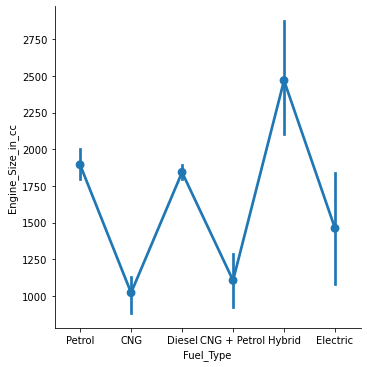

In [107]:
sns.factorplot(data=automobile, x="Fuel_Type", y="Engine_Size_in_cc")
plt.savefig('Images/engine_size_by_fueltype.png', bbox_to_inches='tight')